### Fitting a Curve to a Set of Points

This notebook looks at implementing the least squares algorithm using numpy; to fit a curve to a set of points. This will be used in finding the optic disc in the images. The curve will be fitted to points identified as belonging to the main vessels attached to the optic disc (the points are found using PCA, see the other notebook).

Below are some tests on generated data in an x^2 form, with added noise. The function polyfit() works well on this data but cannot be used to fit the vessels as the graph we need will be of x^0.5 form and polyfit() only takes integers as the degree of the curve.

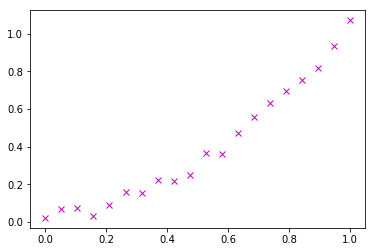

In [1]:
 # For the plottings in the notebook
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit

# The actual plotting functions are in this module
from matplotlib import pyplot as plt

# Create the X array (from 0-1, 20 samples)
X = np.linspace(0, 1, 20)

# Create the Y based on X. equivalent to y=x^2+e,
# where e is error from a normal N(0, 0.1)
Y = X**2 + np.random.rand(20)*0.1

# This is a (2,20), each COL is a vector
points = np.vstack((X,Y))

# Plot the points
plt.plot(X,Y,'mx')

[-0.1086447   1.01199688]


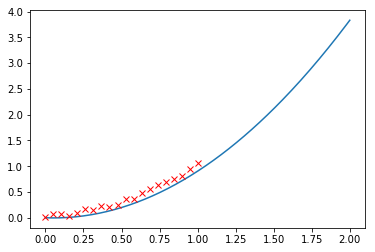

In [2]:
fit = np.polynomial.polynomial.polyfit(X,Y,1)
print(fit)

new_X = np.linspace(0, 2, 200)
Phi = np.vstack((new_X, new_X**2))
new_Y = Phi[0,:]*fit[0] + Phi[1,:]*fit[1]
plt.plot(new_X, new_Y)
plt.plot(X, Y, "rx")

Here we use curve_fit() instead of polyfit(). Rather than taking in the degree that the fitted curve should be, it takes in the function used to generate the data and uses it to generate the fitted curve also.

The data below is made to represented a x^0.5 shape, with noise. The curve then fits well to this using the function described. 

Our data from the images will not have been generated from a function, but from looking at the datasets it can be seen that the two main vessels and optic disc all fit the same general x^0.5 shape so the function func() below can be used. Obviously with the images the curve will have both positive and negative y values, with (0,0) hopefully being the optic disc. 

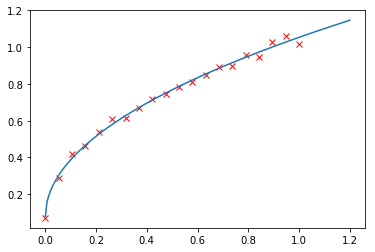

In [3]:
# Attempt to fit square root func
samples = 20
Xs = np.linspace(0,1,20)
noise = np.random.rand(samples)
Ys = np.sqrt(Xs) + noise*0.1

def func(x, a, b):
    return a + b*x**0.5 

popt, pcov = curve_fit(func, Xs, Ys)

# New Stuff with predicted line
new_Xs = np.linspace(0, 1.2, 200)
new_Ys = popt[0] + popt[1]*new_Xs**0.5

plt.plot(Xs, Ys, "rx")
plt.plot(new_Xs, new_Ys)